___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Stock Prices Data Analysis 

In this project fundamental and more advanced Data Analysis are done on the stock prices of 6 American banks over the timeperiod 2006-2015 to see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.  The libraries used are Pandas, Seaborn, Matplotlib, Plotly and Cufflinks.  A mulitlevel index dataframe is used. The data was scraped from the internet and downloaded as a pickle.  Please bear in mind that this project is meant to practice visualization and Pandas skills; it is not meant to be a robust financial analysis or be taken as financial advice on stock prices.

Due to the nature of Plotly and Cufflinks (not being able to view plots in Jupyter Notebooks on GitHub, I have included screenshots, for a quick view, of all the plots that uses Plotly and Cufflinks.

The banks which stock information we will analyse are:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Some interesting analysis done in this project is as follows:

* Determining the percentage change for each closing price.
* Interpreting the maximum and minimum closing prices, seeing, for example, how the inauguration of president Obama affected the stock market.
* Interpreting the distribution plots for Morgan Stanley and CititGroup for the years 2015 and 2008 respectively, where we see that there was a high risk involved in investing at these banks at that time.
* Creating a line plot with Plotly comparing the closing prices for each bank over the entire period of time.  From these curves we can see that CitiGroup had a stock market crash which lasted from 2007 – 2009.
* Plotting the rolling averages (over 30 days) of the closing prices for Bank of America and comparing it with all the closing prices for the bank over the year 2008.
* Determining the strength of correlation between the closing prices of the different banks using a heatmap and clustermap.
* Using Cufflinks to visualize the stock of Bank of America with candlestick plots.
* Using Cufflinks to visualize Simple Moving Average plots (of various time spans; commonly used periods) for Morgan Stanley.
* Using Cufflinks to visualize the Bollinger plot for Bank of America for 2015 and some interpretations on their stocks.


This project was done through Jose Portilla (head of Data Science at Pierian Data Inc.) on Udemy (Python for Data Science and Machine Learning Bootcamp).

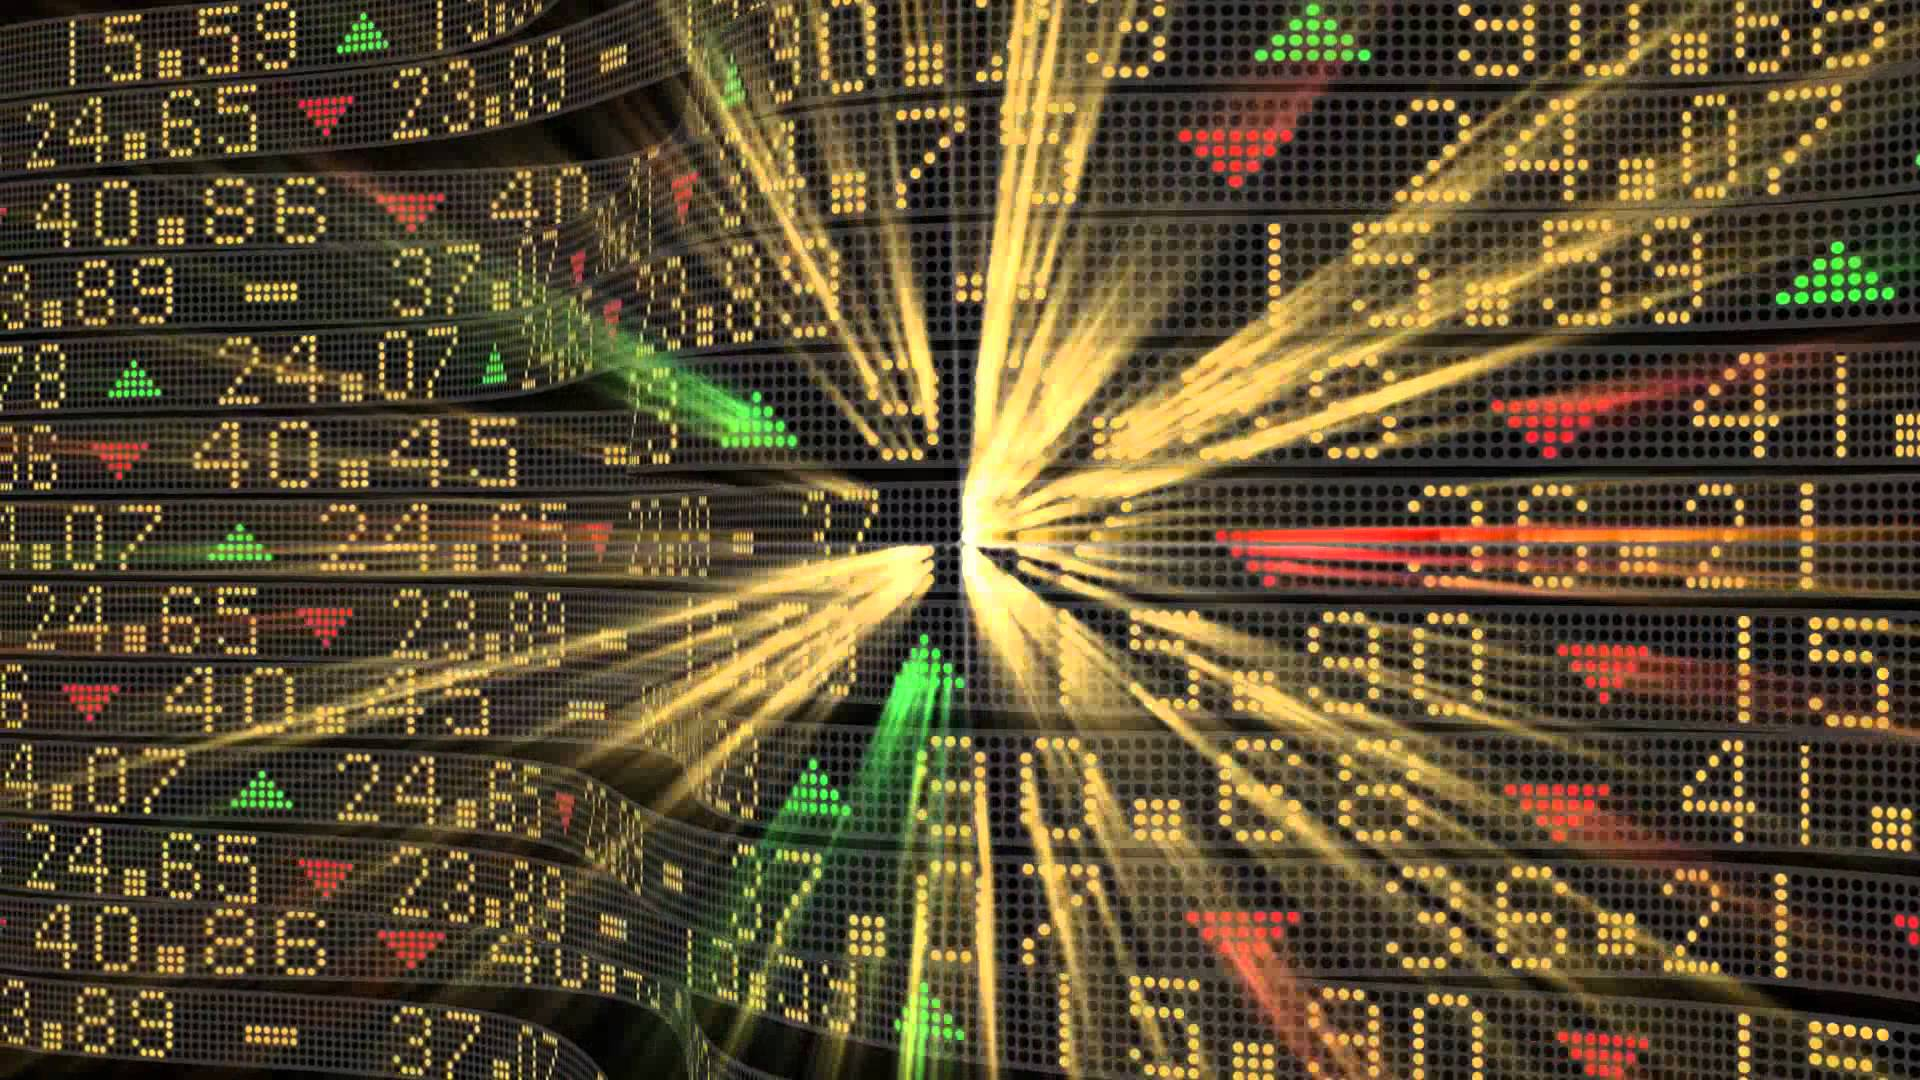

In [1]:
from pandas_datareader import data, wb
from datetime import datetime
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

####  Download the pickle file provided in the lectures and read in the data.

In [2]:
bank_stocks = pd.read_pickle('all_banks')

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [50]:
bank_stocks.columns

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

#### Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

#### Set the column name levels (this is filled out for you):

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# Exploratory Data Analysis

We will be working with a Multi-Level Indexing dataframe.

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [9]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [10]:
# Extracting the data for each bank, since some calculations are done on the individual banks.

BAC = bank_stocks.xs(key = 'BAC', axis=1, level = "Bank Ticker")
BAC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


In [11]:
CityGroup = bank_stocks.xs(key = 'C', axis=1, level = "Bank Ticker")
CityGroup.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,490.0,493.8,481.1,492.9,1537660
2006-01-04,488.6,491.0,483.5,483.8,1871020
2006-01-05,484.4,487.8,484.0,486.2,1143160
2006-01-06,488.8,489.0,482.0,486.2,1370250
2006-01-09,486.0,487.4,483.0,483.9,1680740


In [97]:
CityGroup[CityGroup['Close'] ==4.52]

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2011-05-06,4.55,4.58,4.5,4.52,513178690


In [12]:
GS = bank_stocks.xs(key = 'GS', axis=1, level = "Bank Ticker")
GS.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,126.70,129.44,124.23,128.87,6188700
2006-01-04,127.35,128.91,126.38,127.09,4862000
2006-01-05,126.00,127.32,125.61,127.04,3717600
2006-01-06,127.29,129.25,127.29,128.84,4319600
2006-01-09,128.50,130.62,128.00,130.39,4723500


In [13]:
JPM = bank_stocks.xs(key = 'JPM', axis=1, level = "Bank Ticker")
JPM.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.83,40.36,39.30,40.19,12839400
2006-01-04,39.78,40.14,39.42,39.62,13491800
2006-01-05,39.61,39.81,39.50,39.74,8109400
2006-01-06,39.92,40.24,39.55,40.02,7966900
2006-01-09,39.88,40.72,39.88,40.67,16575200


In [14]:
MS = bank_stocks.xs(key = 'MS', axis=1, level = "Bank Ticker")
MS.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,57.17,58.49,56.74,58.31,5377000
2006-01-04,58.70,59.28,58.35,58.35,7977800
2006-01-05,58.55,58.59,58.02,58.51,5778000
2006-01-06,58.77,58.85,58.05,58.57,6889800
2006-01-09,58.63,59.29,58.62,59.19,4144500


In [15]:
WFC = bank_stocks.xs(key = 'WFC', axis=1, level = "Bank Ticker")
WFC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,31.60,31.98,31.20,31.90,11016400
2006-01-04,31.80,31.82,31.36,31.53,10871000
2006-01-05,31.50,31.56,31.31,31.50,10158000
2006-01-06,31.58,31.78,31.38,31.68,8403800
2006-01-09,31.68,31.82,31.56,31.68,5619600


#### What is the max Close price for each bank's stock throughout the time period?

In [16]:
bank_stocks.xs("Close", axis=1, level = "Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

#### Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = pd.DataFrame()

#### Using Pandas pct_change() on the Close column yields the return values.

In [18]:
bank_stocks.xs("Close", axis=1, level = "Stock Info").pct_change()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [19]:
# The first row in our dataframe has null values.  We will use the data from index 1 onwards.

In [20]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


#### Create a pairplot, using seaborn, of the returns dataframe. What stock stands out to you? Can you figure out why?

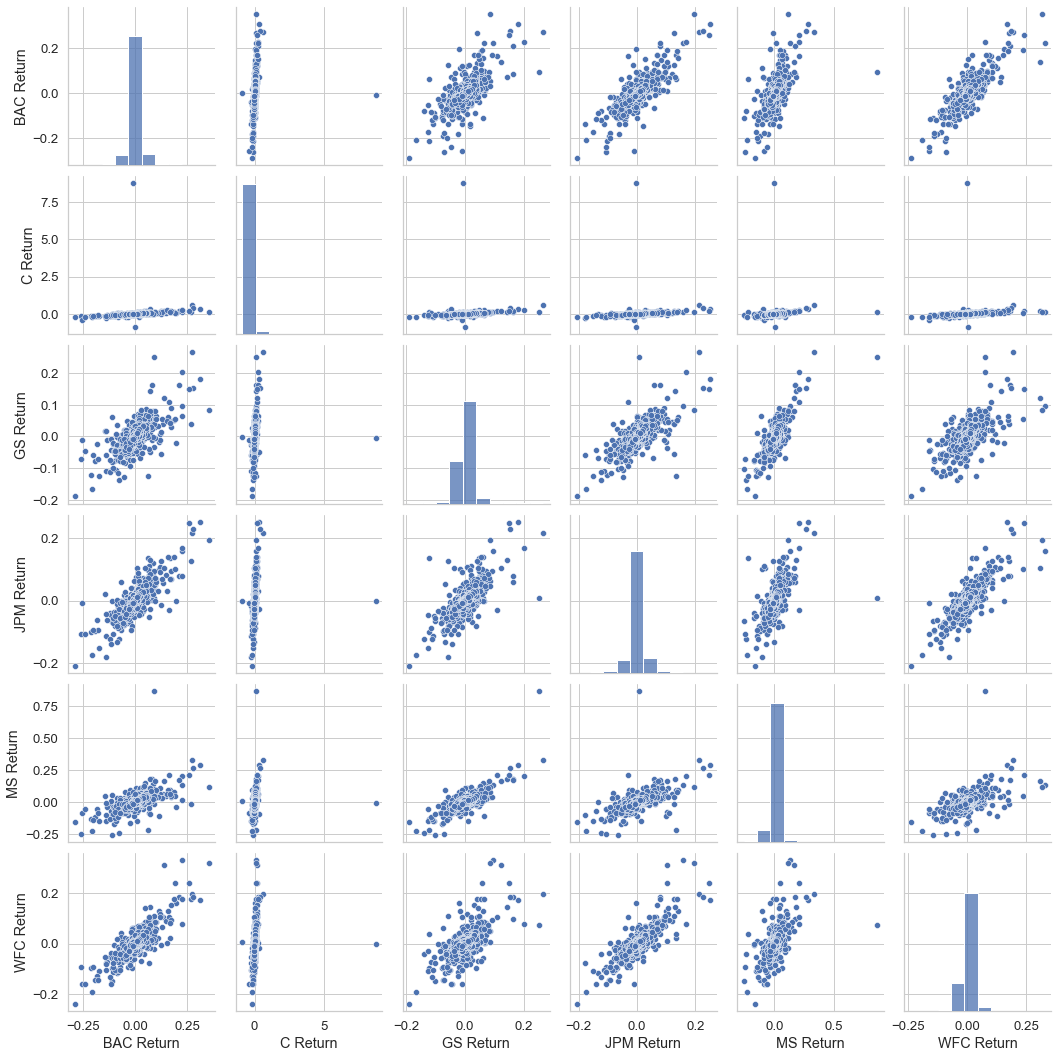

In [124]:
sns.pairplot(returns[1:], diag_kind = 'hist', diag_kws ={'bins':10})

In [22]:
# CitiGroup had a stock market crash in 2008 / 2009 and hence the linear trends when CitiGroup data is plotted against the 
# other banks' data. 

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [23]:
returns.head(2)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.01062,-0.018462,-0.013812,-0.014183,0.000686,-0.011599


In [24]:
returns.max()

BAC Return    0.352691
C Return      8.769912
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

In [25]:
returns.min()

BAC Return   -0.289694
C Return     -0.899107
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [26]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [27]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [28]:
# 4 of the banks had their minimum return on 20 Jaunuary 2009, which is the inaguration date of President Obama, which means
# that traders were not very optimistic about the new president and thus withdrew their funds.
# We can also see that JP Morgans' maximum return was on 21 January 2009, which is the day after the inaguration and the Bank of
# America had their maximum return in April 2009.
# CityGroup had their minimum return on 6 May 2011 and their maximum on 9 May 2011. CitiGroup effected a reverse stock split on 
# 6 May and their maximum return was on 9 May 2011.

#### You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?

In [29]:
# CitiGroup effected a reverse stck split on 6 May which led to a boost in the companys' stock price on 9 May 2011.

#### Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [30]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [ ]:
# Since a bigger standard deviation indicates less stability in the stocks exchange, we see that CityGroup, which has the
# biggest standard deviation, was the riskiest investment over the entire time period. 

In [31]:
# Viewing the standard deviation for 2015:

returns['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [79]:
# In 2015, the riskiest investment was Morgan Stanley with a standard deviation of 0.016249.  Morgan Stanley and Bank of Americas'
# standard deviations are close to each other with a 0.000086 difference. 

#### Create a distplot, using seaborn, of the 2015 returns for Morgan Stanley

In [82]:
returns.head(2)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.01062,-0.018462,-0.013812,-0.014183,0.000686,-0.011599


C:\Users\Rouche\Desktop\Data_Science_Bootcamp\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


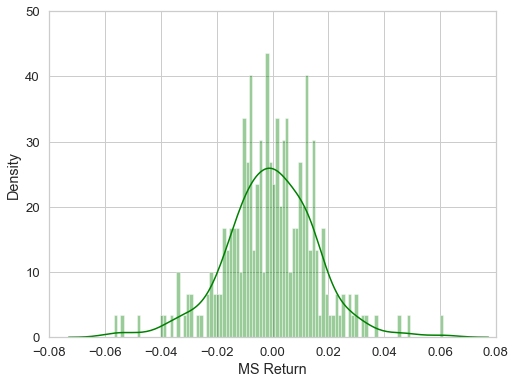

In [45]:
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
ax = sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color = 'green', bins = 100)
ax.set(xlim=(-0.08, 0.08))
ax.set(ylim=(0,50));

In [105]:
# Further analysis:

# Determinig the positive value for the mean, with the aim to find the coefficient of variation.
abs_mean_MS = abs(returns.loc['2015-01-01':'2015-12-31']['MS Return'].mean())
abs_mean_MS

0.0006561669962885635

In [90]:
returns.loc['2015-01-01':'2015-12-31']['MS Return'].max()

0.06123032904148795

In [92]:
returns.loc['2015-01-01':'2015-12-31']['MS Return'].min()

-0.0570008769365683

In [101]:
# Determining the standard deviation

std_MS = returns.loc['2015-01-01':'2015-12-31']['MS Return'].std()
std_MS

0.016249118591541406

In [113]:
# Determining the coefficient of variation

cv_MS = std_MS / mean_MS
cv_MS

24.76369382100941

In [ ]:
# From the above plot we see that the distribition of return values does not vary majorly from the mean.  The highest return 
# value is approximately at 0.06 and the mean has an approximate value of 0.  The highest value is approimately 3.78 standard
# deviations away from the mean. The results show that Morgan stanley was the riskies of the 6 banks for investment in 2015 and 
# with further analysis, i.e. finding the coefficient of variation (CV), we see that there was a high risk involved in investing
# in Morgan Stanley in 2015.

#### Create a distplot using seaborn of the 2008 returns for CitiGroup

C:\Users\Rouche\Desktop\Data_Science_Bootcamp\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


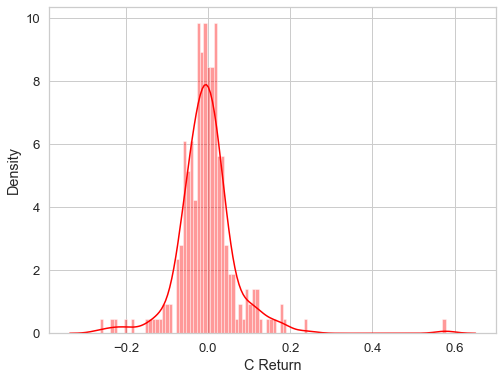

In [54]:
plt.figure(figsize = (8,6))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'red', bins = 100)
ax.set(xlim=(0, 0.65))
ax.set(ylim=(0,10));

In [108]:
# Further analysis:

# Finding the positive value for the mean 

abs_cityB_mean = abs(returns.loc['2008-01-01':'2008-12-31']['C Return'].mean())
abs_cityB_mean

0.0032679637504492705

In [111]:
max_city = returns.loc['2008-01-01':'2008-12-31']['C Return'].max()
max_city

0.5782493368700263

In [110]:
min_city = returns.loc['2008-01-01':'2008-12-31']['C Return'].min()
min_city

-0.2640625

In [109]:
# Standard deviation for CityGroup in 2008

std_cityB = returns.loc['2008-01-01':'2008-12-31']['C Return'].std()
std_cityB

0.07357286034354475

In [112]:
# Finding the coefficient of variation for CityGroup in 2008

cv_city = std_cityB / abs_cityB_mean
cv_city

22.513364884610535

In [114]:
# Analysing the return values of CityGroup in 2008, we see that the mean return was approximately 0, the standard deviation
# 0.07357286 and the largest value is apporoximately 7.8595 standard deviations away from the mean.  
# Most of the seems to be included within 2.33 away from the mean. All these returns fall more or less within  (using the 
#approximate value from the distribution plot) 3.16 standard deviations away from the mean.
# considering the coefficient of variation, we see that their coefficient of variation is 22.51336, which is less than the 
# coefficient of variation for Morgan Stanley in 2015.
# It was very risky to invest in CitiGroup in 2008, also greatly due to the fact that they had a stock market crash which started
# towards the end of 2007 and continued till about mid March 2009.

____
### Visualizations with plotly

In [55]:
import plotly
import cufflinks as cf
cf.go_offline()

#### Create a line plot showing Close price for each bank for the entire index of time.

<AxesSubplot:xlabel='Date'>

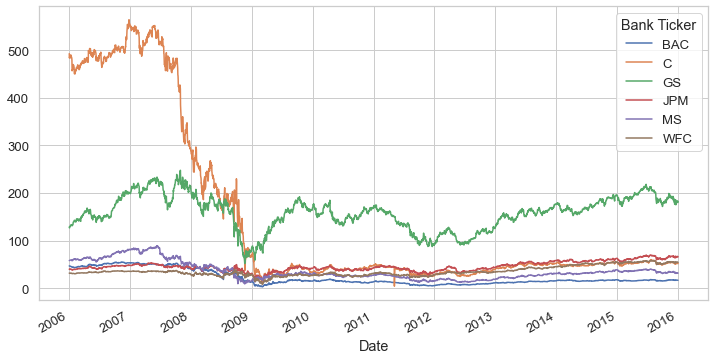

In [90]:
bank_stocks.xs("Close", axis=1, level = "Stock Info").plot(figsize = (12,6))
# plt.xlim(datetime.date(2006), datetime.date(2016))
# plt.ylim(0, 600);
# plt.legend();

In [98]:
bank_stocks.xs("Close", axis=1, level = "Stock Info").iplot()

In [125]:
# From the lineplot and iplot above we can from 2007 - 2009 that CityGroup had a stock market crash.
# Using the interactive plot and zooming in, we see that during this time, the stocks of CityGroup reached a low value of 10.2 on
# 5 March 2009.
# Their lowest Closing value, 4.52, was on 6 April 2011.

####  Analysing Moving Averages for the year 2008
#### Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

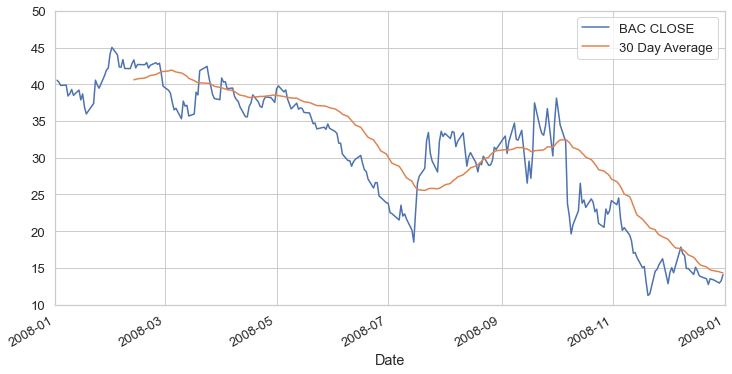

In [71]:
plt.figure(figsize = (12,6))

BAC.loc['2008-01-01':'2008-12-31']['Close'].plot(label = 'BAC CLOSE')
BAC.loc['2008-01-01':'2008-12-31']['Close'].rolling(window = 30).mean().plot(label = '30 Day Average')
plt.xlim(datetime.date(2008,1,1), datetime.date(2009,1,1))
plt.ylim(10, 50);
plt.legend();

#### Create a heatmap of the correlation between the stocks Close Price.

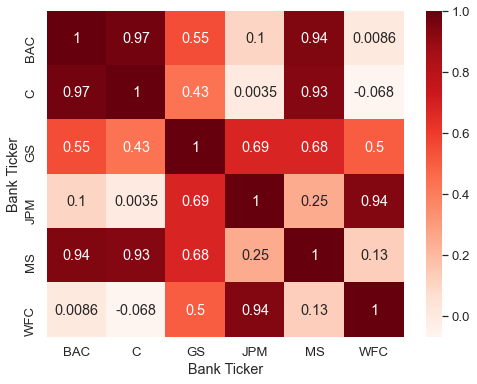

In [66]:
plt.figure(figsize = (8,6))
sns.heatmap(bank_stocks.xs("Close", axis=1, level = "Stock Info").corr(), cmap = 'Reds', annot = True);

#### Create a clustermap to cluster the correlations together:

<Figure size 576x432 with 0 Axes>

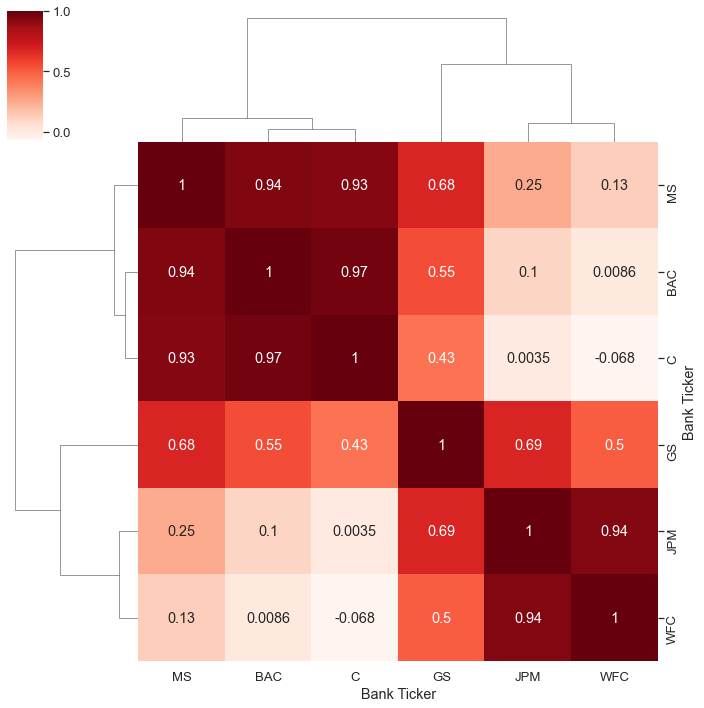

In [68]:
plt.figure(figsize = (8,6))
sns.clustermap(bank_stocks.xs("Close", axis=1, level = "Stock Info").corr(), cmap = 'Reds', annot = True);

In [69]:
# Analysing the heatmap and clustermap, we can make the following deductions:
# There is a very strong correlation between the closing prices of CitiGroup and Bank of America, CitiGroup and
# Morgan Stanley, Bank of America and Morgan Stanley and between Wells Fargo and JPMorgan Chase.
# There is a very weak correlation between the closing prices of CitiGroup and Wells Fargo, CitiGroup and JPMorgan Chase, 
# Bank of America and Wells Fargo, Bank of America and JPMorgan Chase, Morgan Stanley and JPMorgan Chase
# and between Morgan Stanley and Wells Fargo.

### Data Visualizations with cufflinks for Technical Analysis plots.

#### Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

##### As mentioned in the introduction, I have included screenshots of all the plots that uses Plotly and Cufflinks for a quick view.  This is due to 
##### the fact that these plots cannot be seen when someone view this notebook on GitHub.

In [121]:
# I first plot the candlestick curve for the entire period:

BAC[['Open', 'High', 'Low','Close']].iplot(kind = 'candle')

In [122]:
BAC.loc['2015-01-01':'2016-01-01'][['Open', 'High', 'Low','Close']].iplot(kind = 'candle')

# From this plot each 'candlestick' represents the data of one day: the Open, Close, High and Low values.  This is useful to 
# visualize the movement of prices

#### Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [119]:
# The Simple Moving Average curve smooths out the day to day volatility to better see the underlying trend in the data.  
# To identify significant long term support, resistance levels and overall trends, commonly used periods are 50, 100 and 200.
#
# Before I create the plot for 2015, let us view the plot for the entire time period with Simple Moving Averages curves for
# every 100 days and every 200 days:

MS['Close'].ta_plot(study='sma', periods = [100,200], title = 'Simple Moving Averages 2006 - 2015')

In [118]:
# The 5-day, 10-day and 20-day Moving Averages curves are often used to spot near-term trend changes

MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma', periods = [5,10,20], title = 'Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [123]:
# One of the major uses for the Bollinger plot is determine which stocks were over sold or under sold. When a stocks market 
# price is closer to the upper band the stock is viewed as overbought and when a stock's market price is close to the lower band
# the stock is viewed as oversold.

# In the Bollinger plot below the Simple Moving Averages curve for every 14 days and the upper- and lower- band curves are
# included for further analysis

BAC.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll')

In [ ]:
# When we zoom into the Bollinger plot we see that the stock's price is very close to the upper band on 3 June, and thus the 
# stock was viewed as overbought at that time.
# When we zoom into the time period 20 March - 30 March, we see that the stock's price touches the lower band on 25 March, 
# and thus the stock was viewed as oversold on that day.

Information on the financial plots was obtained from:
* https://python.plainenglish.io/xx-minute-beginners-financial-analysis-in-python-366553b587ae
* https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

In [ ]:
#The plots which require financial and stock market expertise are not for the purpose to do indepth analysis on the financial 
#market stocks.
# The purspose for creating these plots using Plotly and Cufflinks is to show what I am able to do with these libraries.  